In [1]:
import pandas as pd
import numpy as np
import json
import glob

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams["font.size"] = 20

import statsmodels.stats.anova as anova
from  scipy.stats import chi2_contingency
import statsmodels.api as sm
import scipy.stats as st
from statsmodels.formula.api import ols
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

# 1.加载数据

In [2]:
# 合并json文件存储为表格
# path = glob.glob(r'E:\data\NLP')


name = []   #作者姓名
year = []   #年份
mv = []   #M_value
ev = []   #E_value
ev_ = []   #作者顺序
df = pd.DataFrame()  #合并文件

# 读取每个文件
for i in range(1,4,1):
#     E:\data\NLP\NLP_100000.json
#文件读取路径
    file = f'E:\\data\\LIS\\LIS_{i}.json'
    print(file)
    data = json.load(open(file,'r'))
    for key in data.keys():
        author = data[key]
        item = author[0]
        
        cnt = 1
        for i in item['authors']:
            name.append(i['name'])
            year.append(item['year'])
            mv.append(item['M_value'])
            ev.append(item['E_value'])
            ev_.append(cnt)
            cnt += 1
    
# 存储新文件
df['name'] = name
df['year'] = year
df['M_value'] = mv
df['E_value1'] = ev
df['E_value2'] = ev_
df.to_csv(r'E:\data\LIS_result_new.csv', index=0)
print("finish")

E:\data\LIS\LIS_1.json
E:\data\LIS\LIS_2.json
E:\data\LIS\LIS_3.json
finish


In [3]:
# 分组后的文件
data_new = pd.read_csv(r'E:\data\LIS_result_new.csv')

# 每个作者的学术年龄，取age>=6
name = data_new.groupby('name')['year'].agg(['min','max'])
name['age'] = name['max'] - name['min']+1
name = name[name['age']>=6]
data_new = data_new.merge(name, how='left', left_on='name', right_on=name.index)
data_new = data_new.dropna(axis = 0, subset = ['age'])

# Group1:学术年龄，Group2:学术生涯
data_new['gap'] = data_new['year'] - data_new['min'] + 1
data_new['group1'] = data_new.apply(lambda x: x['age']//5 if x['age']%5 != 0 else x['age']//5-1, axis=1)
data_new['group2'] = data_new.apply(lambda x: x['gap']//5+1 if x['gap']%5 != 0 else x['gap']//5, axis=1)

In [4]:
# min:该作者最小年份
# max:该作者最大年份
# age:该作者学术年龄
# gap:当前文章聚该作者最小年份的间隔
data_new.describe()

,year,M_value,E_value1,E_value2,min,max,age,gap,group1,group2
count,5252.000000,5252.000000,5252.000000,5252.000000,5252.000000,5252.000000,5252.000000,5252.000000,5252.000000,5252.000000
mean,2004.678218,0.000574,4.099252,4.323305,1999.067022,2009.415842,11.348819,6.611196,1.721059,1.865385
std,7.388841,0.002416,2.571766,9.504672,7.164822,5.437686,5.445300,5.957126,1.051552,1.088174
min,1969.000000,0.000000,0.000000,1.000000,1969.000000,1987.000000,6.000000,1.000000,1.000000,1.000000
25%,2000.000000,0.000081,2.419304,1.000000,1994.000000,2006.000000,7.000000,1.000000,1.000000,1.000000
50%,2006.000000,0.000256,3.687148,2.000000,2000.000000,2010.000000,10.000000,6.000000,1.000000,2.000000
75%,2010.000000,0.000586,5.419513,4.000000,2004.000000,2014.000000,14.000000,9.000000,2.000000,2.000000
max,2017.000000,0.102538,21.854373,66.000000,2011.000000,2017.000000,35.000000,35.000000,6.000000,7.000000


# 2.M_value

Group 1  Period: 1 :中位数: 0.000204 ,均值: 0.00037359074299634596 最大值 0.017082 最小值: 0.0
Group 1  Period: 2 :中位数: 0.000221 ,均值: 0.0003245029069767442 最大值 0.005232 最小值: 0.0
Group 2  Period: 1 :中位数: 0.000301 ,均值: 0.0008544093357271094 最大值 0.102538 最小值: 3e-06
Group 2  Period: 2 :中位数: 0.0003315 ,均值: 0.0005141495327102804 最大值 0.006489 最小值: 0.0
Group 2  Period: 3 :中位数: 0.000279 ,均值: 0.0005357235294117646 最大值 0.018129 最小值: 2e-06
Group 3  Period: 1 :中位数: 0.000446 ,均值: 0.0022528390804597703 最大值 0.102538 最小值: 2e-06
Group 3  Period: 2 :中位数: 0.000194 ,均值: 0.0005185894736842105 最大值 0.003438 最小值: 1.8e-05
Group 3  Period: 3 :中位数: 0.000204 ,均值: 0.00037147422680412366 最大值 0.0044 最小值: 6e-06
Group 3  Period: 4 :中位数: 0.0003395 ,均值: 0.0005332654320987654 最大值 0.002599 最小值: 5e-06
Group 4  Period: 1 :中位数: 0.000478 ,均值: 0.002472053571428572 最大值 0.037011 最小值: 0.0
Group 4  Period: 2 :中位数: 0.000214 ,均值: 0.0004471071428571428 最大值 0.001552 最小值: 1.1e-05
Group 4  Period: 3 :中位数: 0.000429 ,均值: 0.0005714583333333334 最大值 0.0

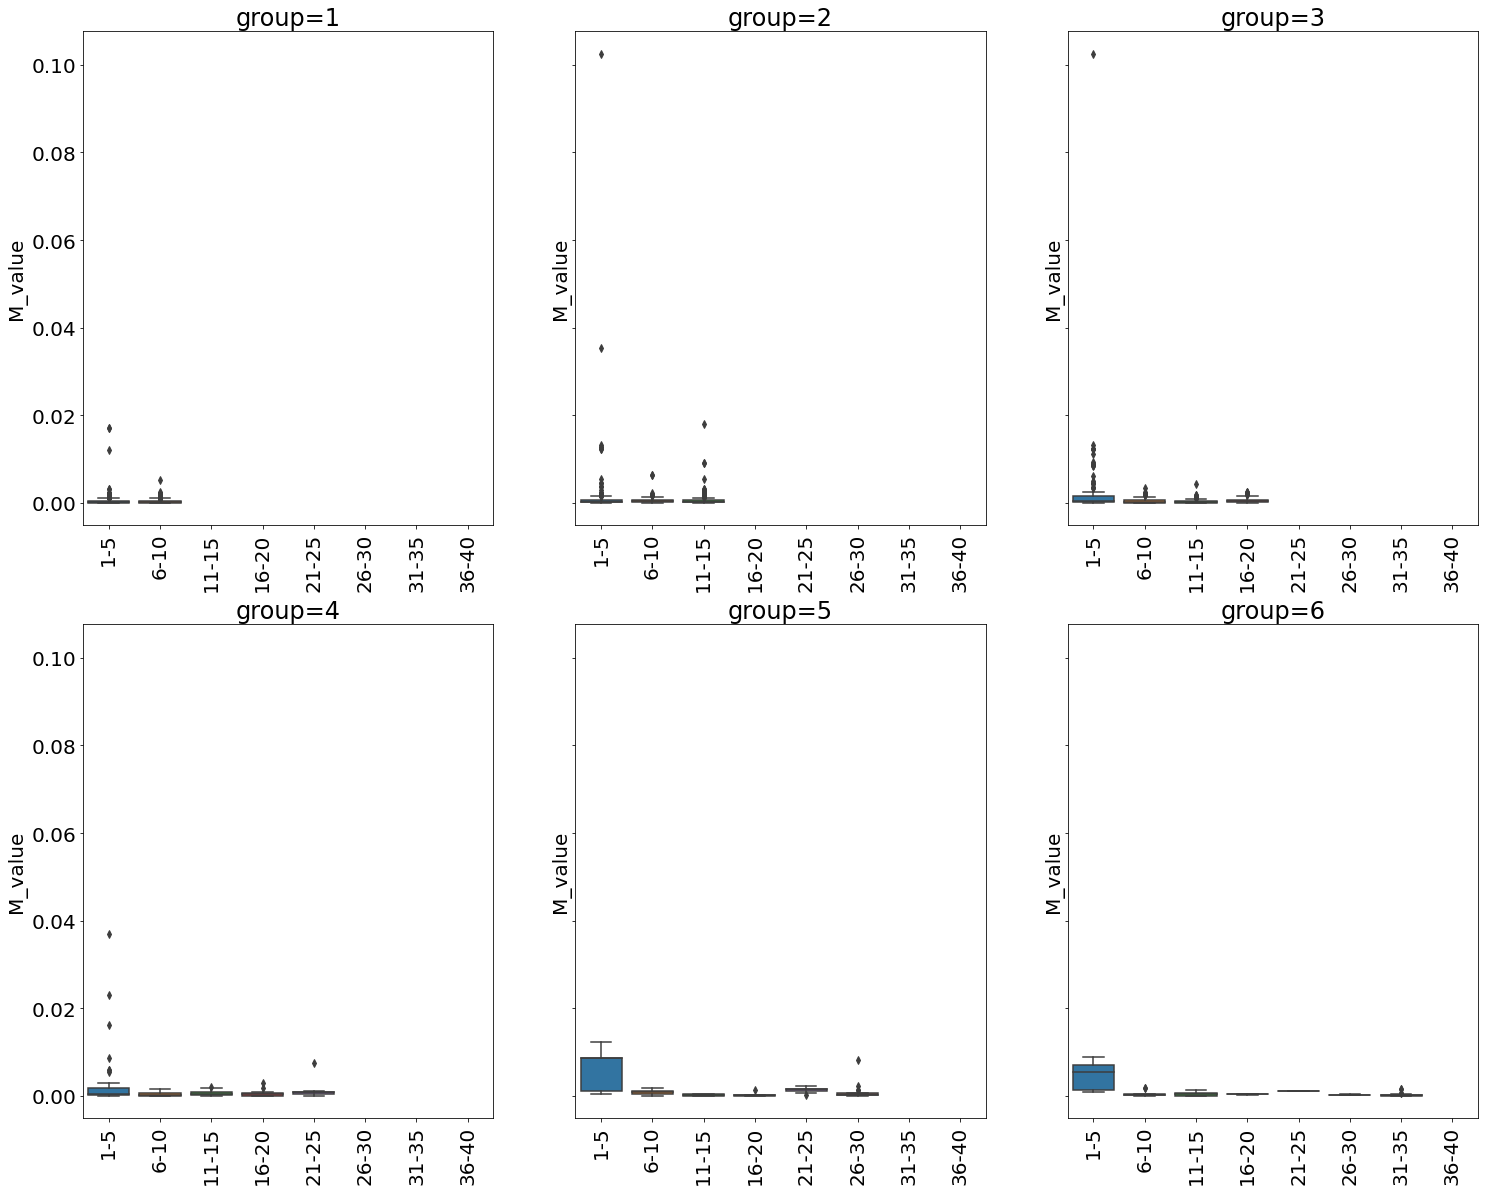

In [5]:
# M_value处理
def median(l):
    l = sorted(l)

    if len(l)%2 == 0:
         mid = (sorted(l)[int(len(l)//2)] + sorted(l)[int(len(l)//2)-1])/2
    else:
        mid = sorted(l)[int(len(l)/2)]
    return mid

def mode(l):
    l = sorted(l)
    return l[-1]

dic = {1:'1-5',2:'6-10',3:'11-15',4:'16-20',5:'21-25',6:'26-30',7:'31-35',8:'36-40'}
fig1,ax1 = plt.subplots(nrows=2, ncols=3, sharey=True, figsize=(25,20))
for i in range(1, 7):
    x1 = data_new[data_new['group1']==i].group2
    x2 = data_new[data_new['group1']==i].M_value
    sns.boxplot(x=x1.map(dic), y=x2, ax=ax1[(i-1)//3,i%3-1],order=['1-5','6-10','11-15','16-20','21-25','26-30','31-35','36-40'])
    ax1[(i-1)//3,i%3-1].set_title('group='+str(i))
    ax1[(i-1)//3,i%3-1].set_xlabel('')
    ax1[(i-1)//3,i%3-1].tick_params(axis='x', labelrotation= 90)
    
for m in range(1, 7):
    for n in range(1, 9):
        value = []
        mvalue = data_new[data_new['group1']==m]
        mvalue = mvalue[mvalue['group2']==n].M_value
        if len(mvalue)==0: continue
        value.append(median(mvalue))
        value.append(mvalue.mean())
        value.append(max(mvalue))
        value.append(min(mvalue))
        print("Group",str(m)," Period:",str(n),":中位数:",value[0],",均值:", value[1],\
                  "最大值",value[2],"最小值:",value[3])

               df    sum_sq   mean_sq          F        PR(>F)
C(group1)     5.0  0.001558  0.000312  27.630147  2.660609e-27
Residual   2453.0  0.027669  0.000011        NaN           NaN


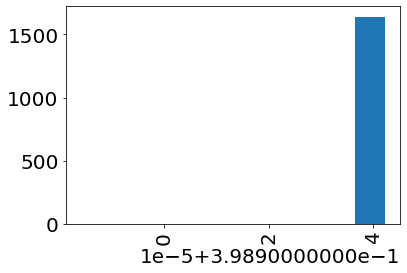

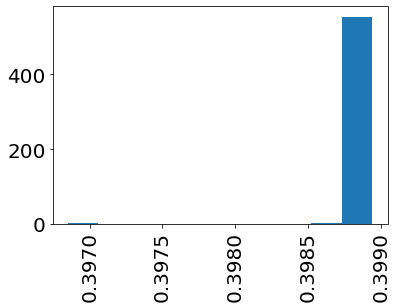

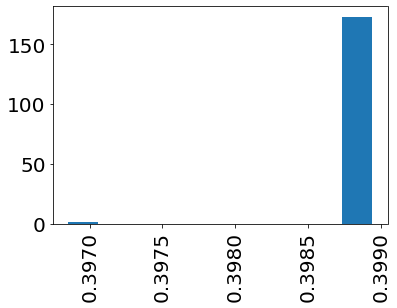

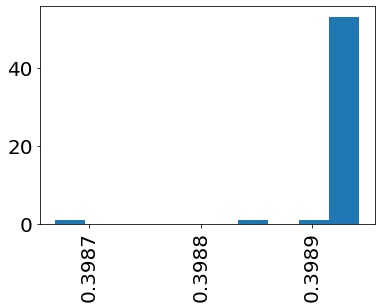

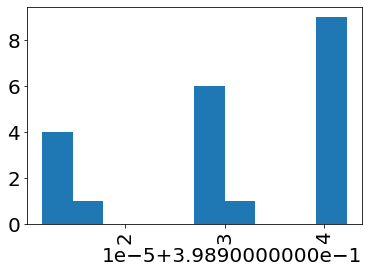

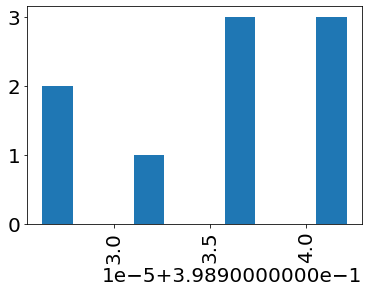

In [6]:
# 显著性差异检验
d1 = data_new[data_new['group2']==1].loc[:,['M_value','group1']]
model1 = ols('M_value ~ C(group1)', data=d1).fit()
anova1 = anova.anova_lm(model1)
print(anova1)

# 概率密度函数
M_pdfs =[]  #存储每组M_value的PDF
for i in range(1,7):
    d = d1[d1['group1']==i]
    M_pdfs.append(st.norm.pdf(d['M_value']))
M_pdfs = np.array(M_pdfs)
for i in range(len(M_pdfs)):
    plt.hist(M_pdfs[i])
    plt.xticks(rotation=90)
    plt.show()

# 3.E_value

In [23]:
for m in range(1, 7):
    mvalues = []
    value = []
    for n in range(1, 9):
        value = []
        mvalue = data_new[data_new['group1']==m]
        mvalue = mvalue[mvalue['group2']==n].E_value
        if len(mvalue)==0: continue
        mvalues += mvalue.to_list()
    if len(mvalues)==0: continue
    mvalues = np.array(mvalues)
    value.append(median(mvalues))
    value.append(mvalues.mean())
    value.append(max(mvalues))
    value.append(min(mvalues))
    print("Group",str(m)," Period:",str(n),":中位数:",value[0],",均值:", value[1],\
                  "最大值",value[2],"最小值:",value[3])

Group 1  Period: 8 :中位数: 1.438436536 ,均值: 1.9664120012518334 最大值 14.68936804 最小值: 0.0
Group 2  Period: 8 :中位数: 1.5799912755 ,均值: 2.085417977347398 最大值 21.85437319 最小值: 0.0
Group 3  Period: 8 :中位数: 1.368427523 ,均值: 1.7242585225288827 最大值 9.375140323 最小值: 0.0
Group 4  Period: 8 :中位数: 1.08527225 ,均值: 1.5520329912570914 最大值 10.5737852 最小值: 0.0
Group 5  Period: 8 :中位数: 1.0372951522 ,均值: 1.917457081777778 最大值 7.418940022 最小值: 0.0
Group 6  Period: 8 :中位数: 1.14712686175 ,均值: 1.5822045986361697 最大值 4.4505137735 最小值: 0.0


Group 1  Period: 1 :中位数: 1.395551546 ,均值: 1.8342321190008992 最大值 12.31979352 最小值: 0.0
Group 1  Period: 2 :中位数: 1.4960558768333332 ,均值: 2.124144099112323 最大值 14.68936804 最小值: 0.0
Group 2  Period: 1 :中位数: 1.4543851319999999 ,均值: 1.9167135635238777 最大值 8.65079398 最小值: 0.0
Group 2  Period: 2 :中位数: 1.64100468075 ,均值: 2.358929937010514 最大值 9.285428344 最小值: 0.0
Group 2  Period: 3 :中位数: 1.8072189556666667 ,均值: 2.15490189721366 最大值 21.85437319 最小值: 0.0
Group 3  Period: 1 :中位数: 1.2355381945 ,均值: 1.7190539262658044 最大值 9.375140323 最小值: 0.0
Group 3  Period: 2 :中位数: 1.7740626335 ,均值: 1.86388069081228 最大值 7.227476199 最小值: 0.0
Group 3  Period: 3 :中位数: 1.2571260344000001 ,均值: 1.4051402679362544 最大值 7.60123115 最小值: 0.0
Group 3  Period: 4 :中位数: 1.52369028875 ,均值: 1.8390484265926956 最大值 7.464608499 最小值: 0.0
Group 4  Period: 1 :中位数: 1.108494292 ,均值: 1.5002850567946429 最大值 5.877951611 最小值: 0.0
Group 4  Period: 2 :中位数: 1.9609763187499998 ,均值: 2.107853445422619 最大值 4.728366258 最小值: 0.0
Group 4  Period: 3 :中位

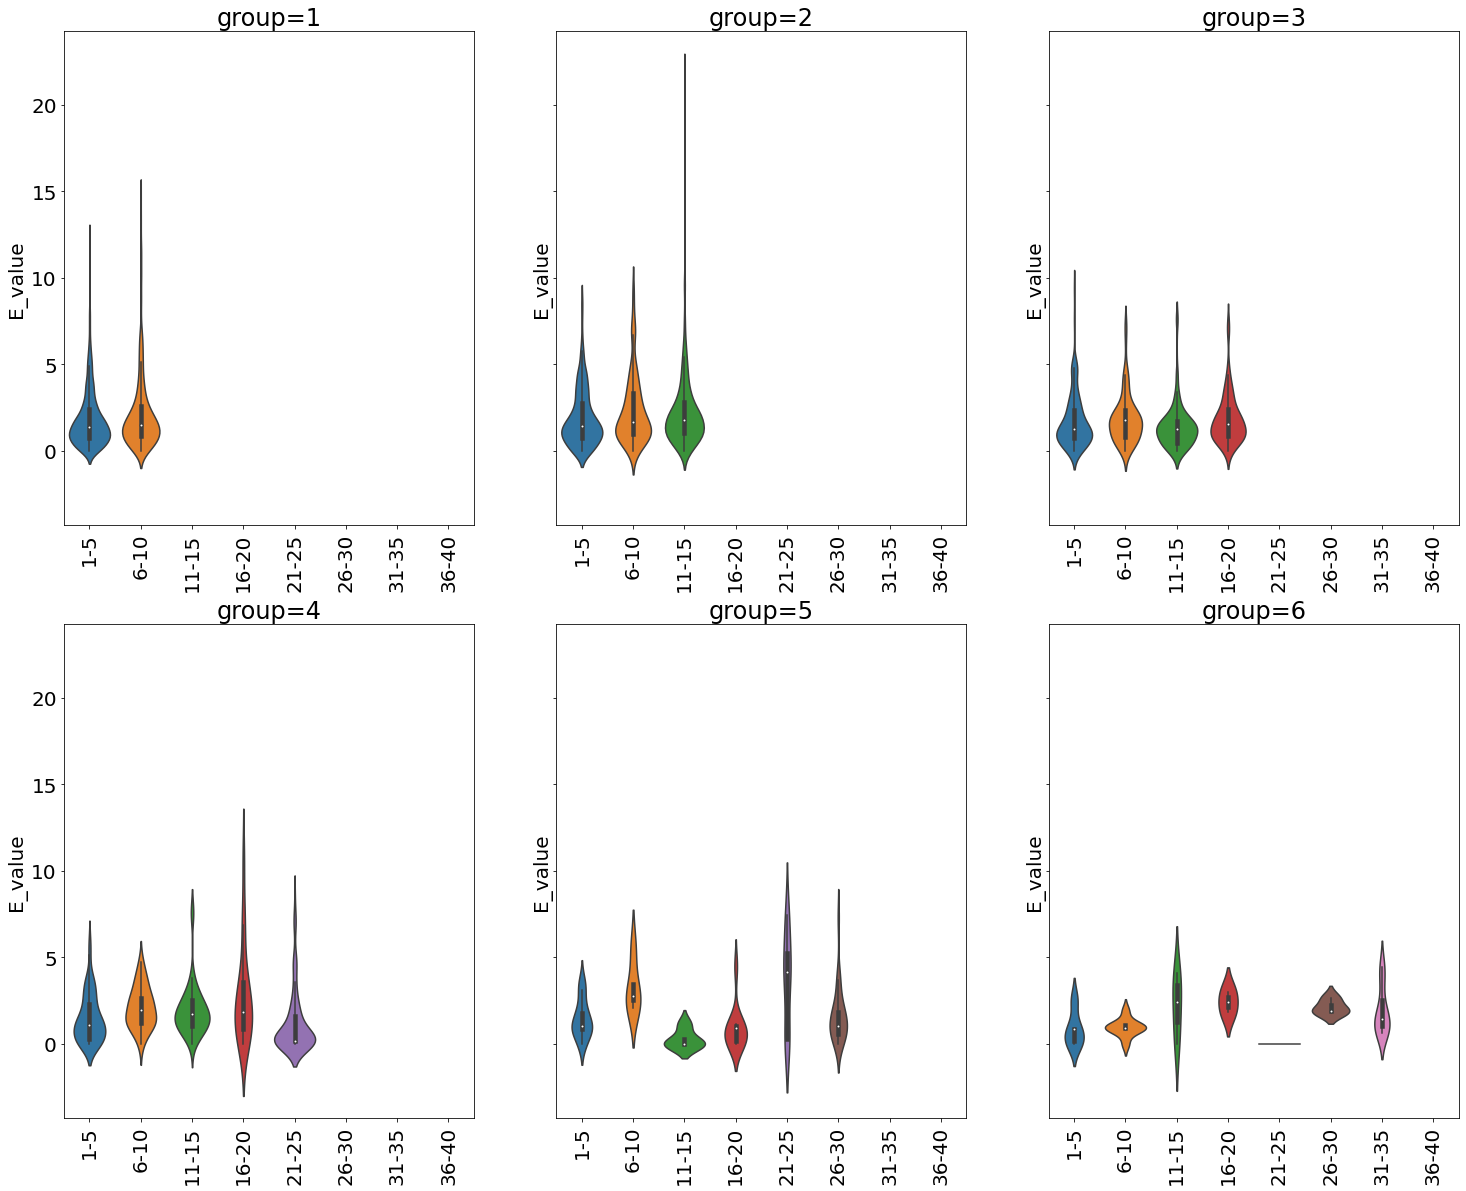

In [7]:
# 计算真正E_value
data_new['E_value'] = data_new['E_value1']*(1/data_new['E_value2'])

# E_value处理
fig2,ax2 = plt.subplots(nrows=2, ncols=3, sharey=True,figsize=(25,20))
for i in range(1, 7):
    x1 = data_new[data_new['group1']==i].group2
    x2 = data_new[data_new['group1']==i].E_value
    sns.violinplot(x=x1.map(dic), y=x2, ax=ax2[(i-1)//3,i%3-1],order=['1-5','6-10','11-15','16-20','21-25','26-30','31-35','36-40']) #boxplot显示不清楚，这里用了violinplot
    ax2[(i-1)//3,i%3-1].set_title('group='+str(i))
    ax2[(i-1)//3,i%3-1].set_xlabel('')
    ax2[(i-1)//3,i%3-1].tick_params(axis='x', labelrotation= 90)
    
for m in range(1, 7):
    for n in range(1, 9):
        value = []
        mvalue = data_new[data_new['group1']==m]
        mvalue = mvalue[mvalue['group2']==n].E_value
        if len(mvalue)==0: continue
        value.append(median(mvalue))
        value.append(mvalue.mean())
        value.append(max(mvalue))
        value.append(min(mvalue))
        print("Group",str(m)," Period:",str(n),":中位数:",value[0],",均值:", value[1],\
                  "最大值",value[2],"最小值:",value[3])

               df       sum_sq   mean_sq         F    PR(>F)
C(group1)     5.0    23.109318  4.621864  1.753752  0.119094
Residual   2453.0  6464.673113  2.635415       NaN       NaN


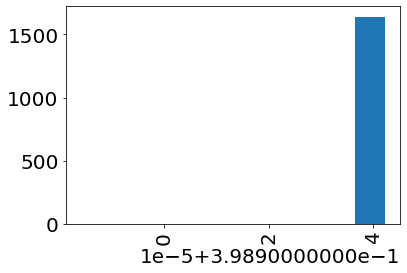

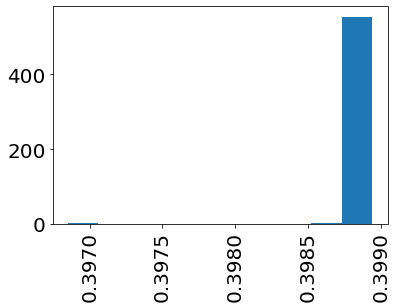

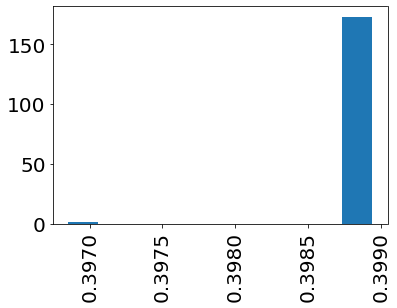

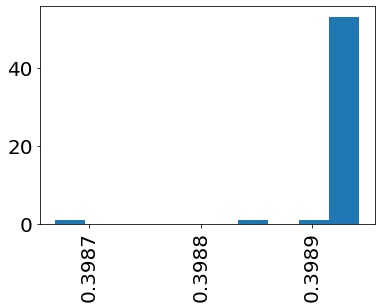

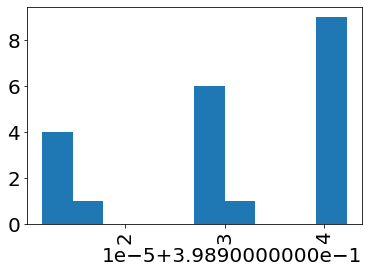

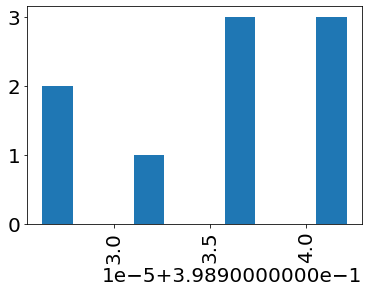

In [8]:
# 显著性差异检验
d2 = data_new[data_new['group2']==1].loc[:,['E_value','group1']]
model2 = ols('E_value ~ C(group1)', data=d2).fit()
anova2 = anova.anova_lm(model2)
print(anova2)

# 概率密度函数
E_pdfs =[]  #存储每组E_value的PDF
for i in range(1,7):
    d = d1[d1['group1']==i]
    E_pdfs.append(st.norm.pdf(d['M_value']))
    
E_pdfs = np.array(E_pdfs)
for i in range(len(E_pdfs)):
    plt.hist(E_pdfs[i])
    plt.xticks(rotation=90)
    plt.show()

# 4.Stage

In [9]:
# 计算每个阶段的rank
def rank(r,l):
    if r<= 0.2*l: return 1
    elif r<= 0.4*l: return 2
    elif r<= 0.6*l: return 3
    elif r<=0.8*l: return 4
    else: return 5
    
for i in range(1,9):
    stage = data_new[data_new['group2']==i].groupby(['name'])['E_value'].sum().sort_values()
    d = dict()
    l = len(stage)
    c = 1
    for j in stage.index:
        r = rank(c,l)
        d[j]=r
        c += 1
    col = 's'+str(i)
    data_new[col] = data_new['name'].map(d)

# 没有的用0填充
data_new = data_new.fillna(0)

In [10]:
# E_value:作者真实E_value
# s1-s8: 该作者每个阶段的stage
data_new.head()

,name,year,M_value,E_value1,E_value2,min,max,age,gap,group1,group2,E_value,s1,s2,s3,s4,s5,s6,s7,s8
65,Aleksandra Horvat,2003,0.000000,0.000000,1,2003.0,2008.0,6.0,1.0,1.0,1.0,0.000000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
66,Min Wu,2010,0.000216,4.427641,1,2008.0,2016.0,9.0,3.0,1.0,1.0,4.427641,5,2.0,0.0,0.0,0.0,0.0,0.0,0.0
69,Min Wu,2010,0.000216,4.427641,1,2008.0,2016.0,9.0,3.0,1.0,1.0,4.427641,5,2.0,0.0,0.0,0.0,0.0,0.0,0.0
72,Min Wu,2010,0.000216,4.427641,1,2008.0,2016.0,9.0,3.0,1.0,1.0,4.427641,5,2.0,0.0,0.0,0.0,0.0,0.0,0.0
97,Insup Lee,1997,0.000244,3.169670,2,1989.0,2010.0,22.0,9.0,4.0,2.0,1.584835,2,5.0,3.0,3.0,3.0,0.0,0.0,0.0


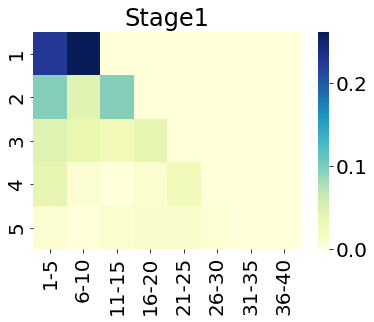

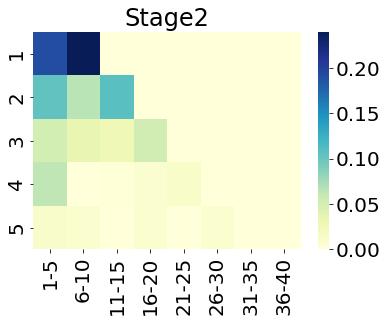

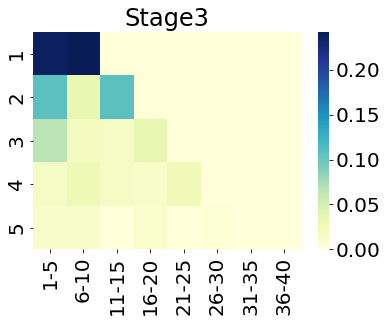

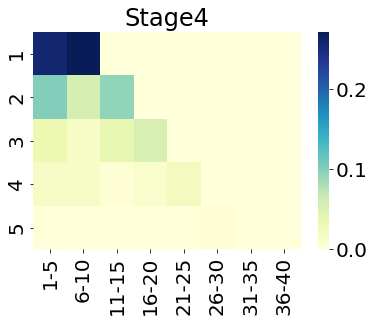

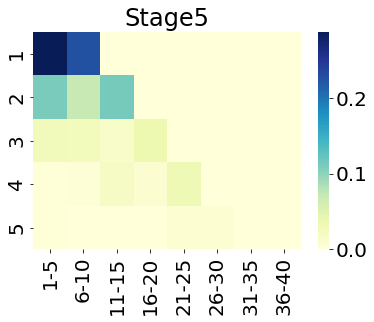

In [11]:
#概率分布热力图
# fig3, ax3 = plt.subplots(nrows=1,ncols=6)
for s in range(1,6):
    # stage1-5
    y = [1,2,3,4,5]
    x = ['1-5','6-10','11-15','16-20','21-25','26-30','31-35','36-40']
    temp = []
    for i in range(1,6):
        # 计算各组stage的概率
        t = []
        for j in range(1,9):
            # 计算各组不同阶段stage的概率
            c = 's'+str(j)
            t.append(data_new[data_new['group1']==i][c].to_list().count(s))
        temp.append(t)
    temp = np.array(temp)
    temp = np.divide(temp, temp.sum())
    temp = pd.DataFrame(columns=x, index=y,data=temp)
    plt.title('Stage'+str(s))
    sns.heatmap(temp, cmap='YlGnBu')
    plt.show()

In [13]:
#Stage显著性检验
cols = ['s1','s2','s3','s4','s5','s6','s7']
kt= chi2_contingency(data_new.loc[:,cols])
print('卡方值=%.4f, p值=%.4f, 自由度=%i expected_frep=%s'%kt)

卡方值=80231.8736, p值=0.0000, 自由度=31506 expected_frep=[[0.84532111 0.67479397 0.28478081 ... 0.05963817 0.01526308 0.00629053]
 [2.95862388 2.3617789  0.99673282 ... 0.2087336  0.05342078 0.02201687]
 [2.95862388 2.3617789  0.99673282 ... 0.2087336  0.05342078 0.02201687]
 ...
 [4.22660555 3.37396986 1.42390403 ... 0.29819086 0.0763154  0.03145267]
 [4.22660555 3.37396986 1.42390403 ... 0.29819086 0.0763154  0.03145267]
 [5.91724777 4.72355781 1.99346565 ... 0.41746721 0.10684157 0.04403374]]


# 6.相关与回归分析

In [14]:
# 计算各阶段E_value之和
d = data_new.groupby(['group2','name'])['E_value'].sum()
d = pd.DataFrame(d)
data_new = data_new.merge(d,how='left',on=['group2','name'])
data_new = data_new.rename(columns={'E_value_x':'E_value','E_value_y':'Sum_E'})

# Sum_E:该作者在当前阶段E_value的和
data_new.head()

,name,year,M_value,E_value1,E_value2,min,max,age,gap,group1,...,E_value,s1,s2,s3,s4,s5,s6,s7,s8,Sum_E
0,Aleksandra Horvat,2003,0.000000,0.000000,1,2003.0,2008.0,6.0,1.0,1.0,...,0.000000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,Min Wu,2010,0.000216,4.427641,1,2008.0,2016.0,9.0,3.0,1.0,...,4.427641,5,2.0,0.0,0.0,0.0,0.0,0.0,0.0,19.032458
2,Min Wu,2010,0.000216,4.427641,1,2008.0,2016.0,9.0,3.0,1.0,...,4.427641,5,2.0,0.0,0.0,0.0,0.0,0.0,0.0,19.032458
3,Min Wu,2010,0.000216,4.427641,1,2008.0,2016.0,9.0,3.0,1.0,...,4.427641,5,2.0,0.0,0.0,0.0,0.0,0.0,0.0,19.032458
4,Insup Lee,1997,0.000244,3.169670,2,1989.0,2010.0,22.0,9.0,4.0,...,1.584835,2,5.0,3.0,3.0,3.0,0.0,0.0,0.0,13.909653


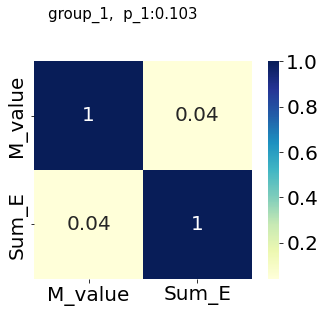

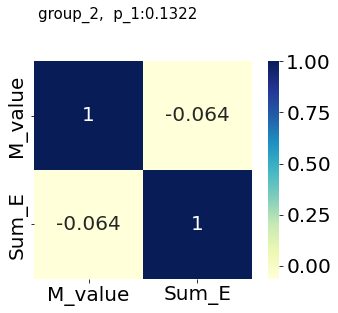

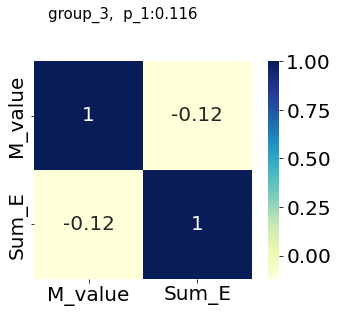

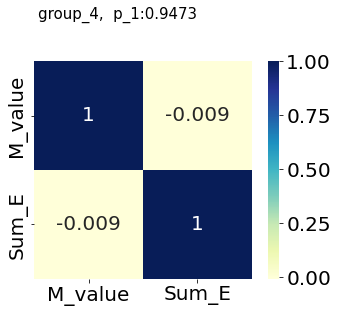

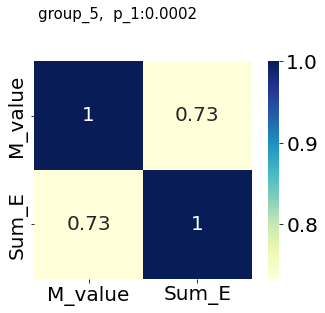

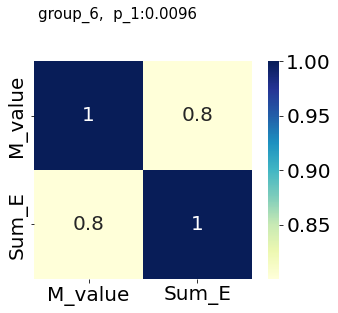

In [15]:
# 计算各组人员在[1,5]阶段的M_value与各阶段E_value之和的相关性，画热力图。
for i in range(1,7):
    mvalue = data_new[data_new['group1']==i]
    mvalue = mvalue[mvalue['group2']==1]
    r,p = stats.pearsonr(mvalue.M_value, mvalue.Sum_E)
    p = round(p,4)
    s = "group_"+str(i)+",  p_1:"+str(p)
    plt.text(1.5,-0.5,s,fontsize=15,verticalalignment="top",horizontalalignment="right")
    sns.heatmap(mvalue.loc[:,['M_value', 'Sum_E']].corr(), cmap='YlGnBu',square=True, annot=True)
    plt.show()

In [16]:
# 用线性回归分析M_value与各阶段E_value之和的回归关系
model3=ols('M_value~Sum_E',data=data_new).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                M_value   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7659
Date:                Wed, 11 May 2022   Prob (F-statistic):              0.382
Time:                        10:00:38   Log-Likelihood:                 24195.
No. Observations:                5252   AIC:                        -4.839e+04
Df Residuals:                    5250   BIC:                        -4.837e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0006    4.5e-05     13.326      0.000       0.001       0.001
Sum_E      -2.692e-06   3.08e-06     -0.875      0.382   -8.72e-06    3.34e-06
==============================================================================
Omnibus:                    13841.386   Durbin-Watson:                   1.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        331011786.695
Skew:                          30.827   Prob(JB):                         0.00
Kurtosis:                    1231.340   Cond. No.                         19.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

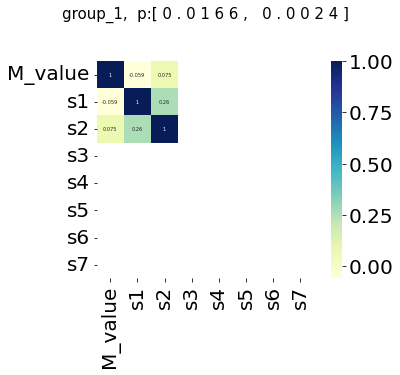

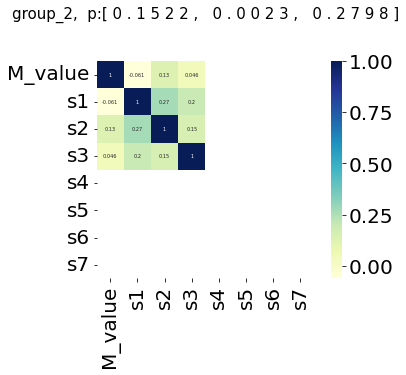

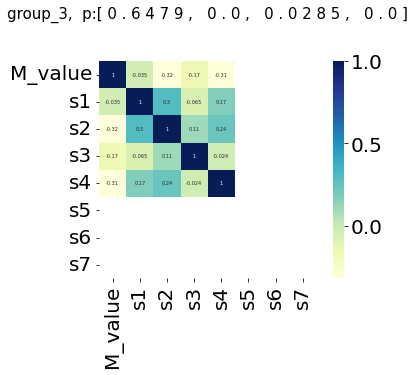

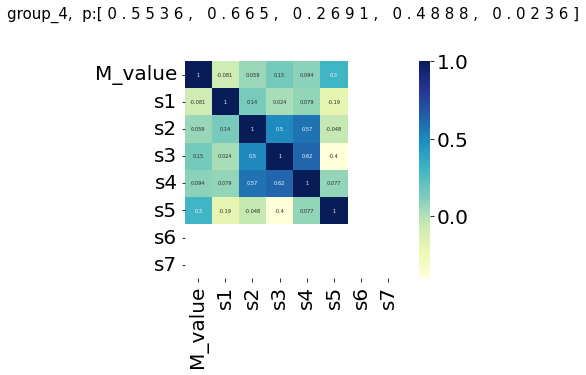

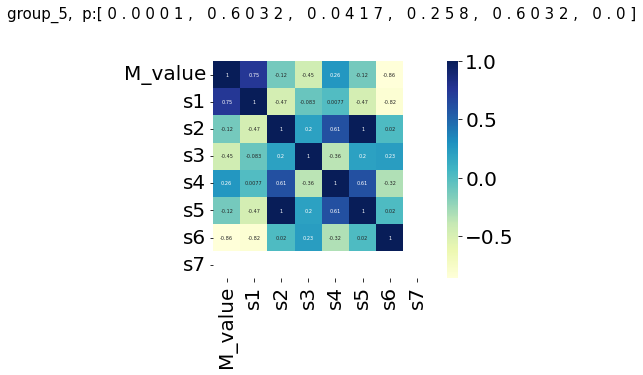

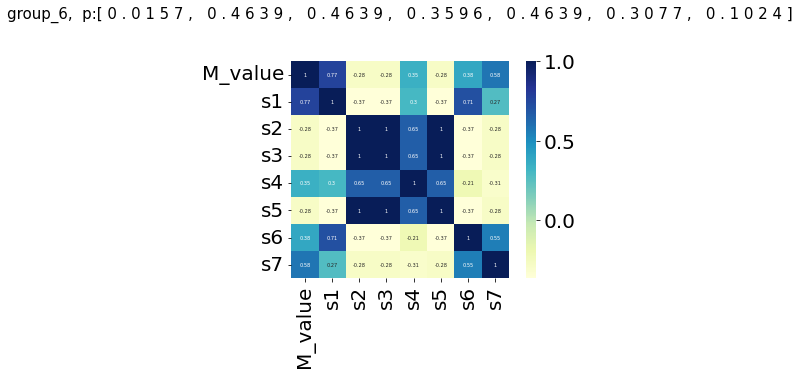

In [24]:
# 计算各组人员在[1,5]阶段的M_value与各阶段stage的相关性，画热力图。
for i in range(1,7):
    cols = ['M_value','s1','s2','s3','s4','s5','s6','s7']
    mvalue = data_new[data_new['group1']==i]
    mvalue = mvalue[mvalue['group2']==1]
    
    ps = []
    for j in range(1,i+2):
        c = 's'+str(j)
        r,p = stats.spearmanr(mvalue.M_value, mvalue.loc[:,c])
        ps.append(round(p,4))
    s = "group_"+str(i)+",  p:"+' '.join(str(ps))
    plt.text(4,-2,s,fontsize=15,verticalalignment="top",horizontalalignment="center")
    sns.heatmap(mvalue.loc[:,cols].corr(method='spearman'), cmap='YlGnBu',square=True, annot=True,annot_kws={'size':5})
    plt.show()

In [25]:
# 用有序logistic回归分析M_value与各阶段stage的回归关系。
cols = ['s1','s2','s3','s4','s5','s6','s7']
logit = sm.Logit(data_new['M_value'], data_new.loc[:,cols]).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.001538
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                M_value   No. Observations:                 5252
Model:                          Logit   Df Residuals:                     5245
Method:                           MLE   Df Model:                            6
Date:                Wed, 11 May 2022   Pseudo R-squ.:                     inf
Time:                        11:56:13   Log-Likelihood:                -8.0778
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
s1            -2.2326      0.532     -4.200      0.000      -3.274      -1.191
s2            -1.2710      0.484     -2.627      0.009      -2.219      -0.323
s3            -0.7867      0.378     -2.082      0.037      -1.528      -0.046
s4            -0.4884      0.414     -1.180      0.238      -1.300       0.323
s5            -0.5610      0.503     -1.115      0.265      -1.547       0.425
s6            -0.0390      0.654     -0.060      0.952      -1.321       1.243
s7            -1.3450      2.249     -0.598      0.550      -5.753       3.062
==============================================================================

Possibly complete quasi-separation: A fraction 0.26 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Optimization terminated successfully.
         Current function value: 0.001746
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                M_value   No. Observations:                 5252
Model:                          Logit   Df Residuals:                     5251
Method:                           MLE   Df Model:                            0
Date:                Wed, 11 May 2022   Pseudo R-squ.:                     inf
Time:                        11:56:21   Log-Likelihood:                -9.1676
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
s1            -4.4625      0.328    -13.622      0.000      -5.105      -3.820

Possibly complete quasi-sep

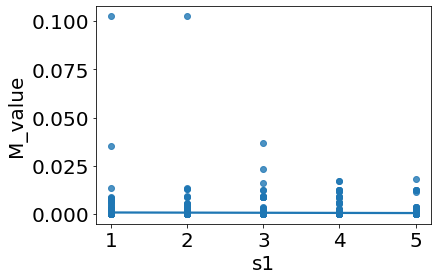

Optimization terminated successfully.
         Current function value: 0.138798
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                M_value   No. Observations:                 5252
Model:                          Logit   Df Residuals:                     5251
Method:                           MLE   Df Model:                            0
Date:                Wed, 11 May 2022   Pseudo R-squ.:                     inf
Time:                        11:56:22   Log-Likelihood:                -728.97
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
s2            -4.6646      0.405    -11.531      0.000      -5.457      -3.872

Possibly complete quasi-sep

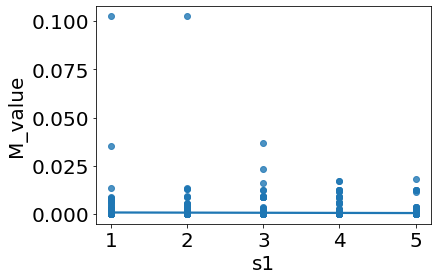

Optimization terminated successfully.
         Current function value: 0.464351
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                M_value   No. Observations:                 5252
Model:                          Logit   Df Residuals:                     5251
Method:                           MLE   Df Model:                            0
Date:                Wed, 11 May 2022   Pseudo R-squ.:                     inf
Time:                        11:56:22   Log-Likelihood:                -2438.8
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
s3            -4.1851      0.511     -8.184      0.000      -5.187      -3.183


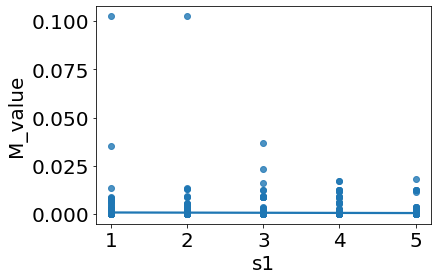

Optimization terminated successfully.
         Current function value: 0.595383
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                M_value   No. Observations:                 5252
Model:                          Logit   Df Residuals:                     5251
Method:                           MLE   Df Model:                            0
Date:                Wed, 11 May 2022   Pseudo R-squ.:                     inf
Time:                        11:56:22   Log-Likelihood:                -3127.0
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
s4            -3.9604      0.656     -6.035      0.000      -5.247      -2.674


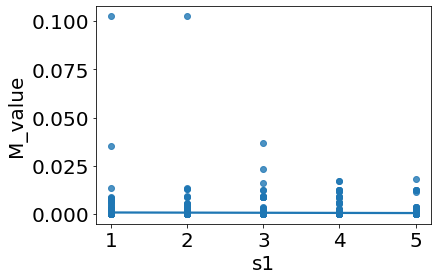

Optimization terminated successfully.
         Current function value: 0.645772
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                M_value   No. Observations:                 5252
Model:                          Logit   Df Residuals:                     5251
Method:                           MLE   Df Model:                            0
Date:                Wed, 11 May 2022   Pseudo R-squ.:                     inf
Time:                        11:56:22   Log-Likelihood:                -3391.6
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
s5            -4.0680      0.848     -4.797      0.000      -5.730      -2.406


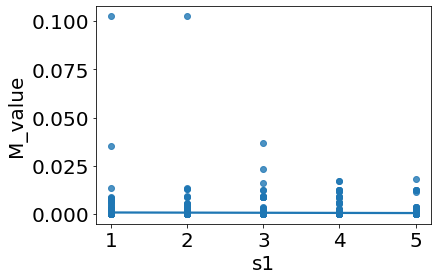

Optimization terminated successfully.
         Current function value: 0.680178
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                M_value   No. Observations:                 5252
Model:                          Logit   Df Residuals:                     5251
Method:                           MLE   Df Model:                            0
Date:                Wed, 11 May 2022   Pseudo R-squ.:                     inf
Time:                        11:56:23   Log-Likelihood:                -3572.3
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
s6            -3.1831      1.282     -2.483      0.013      -5.696      -0.670


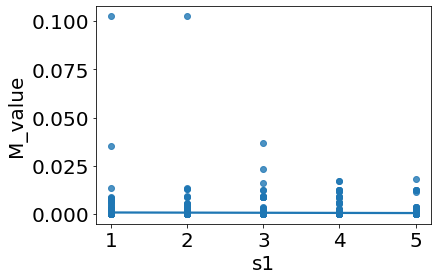

Optimization terminated successfully.
         Current function value: 0.686980
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                M_value   No. Observations:                 5252
Model:                          Logit   Df Residuals:                     5251
Method:                           MLE   Df Model:                            0
Date:                Wed, 11 May 2022   Pseudo R-squ.:                     inf
Time:                        11:56:23   Log-Likelihood:                -3608.0
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
s7            -3.6807      2.159     -1.705      0.088      -7.913       0.551


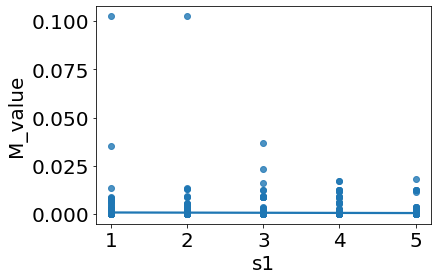

In [26]:
for i in ['s1','s2','s3','s4','s5','s6','s7']:
    logit = sm.Logit(data_new['M_value'], data_new.loc[:,i]).fit()
    print(logit.summary())
    sns.regplot(x='s1',y='M_value',data = data_new)
    plt.show()